In [82]:
# Import the needed libraries
import numpy as np  
import pandas as pd  
import tensorflow as tf  
import urllib.request as request  
import matplotlib.pyplot as plt

# Download dataset
IRIS_TRAIN_URL = "churn-einzelhandel-train.csv"  
IRIS_TEST_URL = "churn-einzelhandel-test.csv"

names = ['churn_flag', 'timezone_cd', 'tenure_visit', 'branch', 'abc_cd', 'abc_detailed_cd', 'avg_no_main_cat_1y', 'avg_no_main_cat_q1', 'avg_no_main_cat_q2', 'avg_no_main_cat_th', 'avg_no_main_cat_lh', 'avg_articles_6_6', 'avg_articles_q1_q2', 'ret_visits_per_chg_q1_q2', 'ret_sales_per_chg_q1_q2', 'visit_gap_ratio_th', 'visit_gap_ratio_1y', 'visit_gap_ratio_per_chg_6_6', 'avg_days_between_visits', 'home_st_visits_per_q1', 'home_st_visits_per_6_6', 'basket_spend', 'basket_spend_per_chg_6_6', 'basket_spend_per_chg_q1_q2', 'f_sales_per_chg_6_6', 'nf_visits_per_chg_6_6', 'nf_sales_per_chg_6_6', 'p_visits_per_chg_6_6', 'p_sales_per_chg_6_6', 'ret_visits_per_chg_6_6', 'ret_sales_per_chg_6_6', 'f_visits_per_chg_q1_q2', 'nf_visits_per_chg_q1_q2', 'nf_sales_per_chg_q1_q2', 'p_visits_per_chg_q1_q2', 'p_sales_per_chg_q1_q2', 'consistency_mnth_cd', 'consistency_qtr_cd', 'distinct_weeks_bought', 'expect_visit_flag', 'expect_visit_flag2', 'promo_sales_per', 'margin_per', 'food_sales_per', 'food_promo_per', 'nf_promo_per', 'food_colli_per', 'food_pieces_per', 'sales_last_model_period_per', 'visits_last_model_period_per', 'distinct_stores', 'recency', 'margin_1y', 'home_visits_q1', 'home_visits_lh', 'home_visits_th', 'visit_gap_th', 'visit_gap_lh', 'visit_gap_1y', 'promo_sales_1y', 'promo_sales_q1', 'promo_sales_q2', 'promo_sales_th', 'promo_sales_lh', 'nf_promo_sales', 'food_promo_sales', 'promo_visits_q1', 'promo_visits_q2', 'promo_visits_th', 'promo_visits_lh', 'promo_visits_1y', 'nf_sales_1y', 'nf_sales_q1', 'nf_sales_q2', 'nf_sales_th', 'nf_sales_lh', 'nf_visits_q1', 'nf_visits_q2', 'nf_visits_th', 'nf_visits_lh', 'food_sales_1y', 'food_sales_th', 'food_sales_lh', 'food_visits_1y', 'food_visits_q1', 'food_visits_q2', 'pieces', 'food_colli', 'food_pieces', 'colli_1y', 'colli_q1', 'home_store_visits_q1', 'home_store_visits_th', 'home_store_visits_lh', 'visits_q1', 'visits_q2', 'visits_q3', 'visits_q4', 'visits_1y', 'visits_th', 'visits_lh', 'sales_1y', 'sales_q1', 'sales_q2', 'sales_q3', 'sales_q4', 'sales_th', 'sales_lh', 'ret_visits_q1', 'ret_visits_q2', 'ret_visits_th', 'ret_visits_lh', 'ret_sales_q1', 'ret_sales_q2', 'ret_sales_th', 'ret_sales_lh', 'ret_sales_1y', 'prediction_week']  
train = pd.read_csv(IRIS_TRAIN_URL, names=names, skiprows=0)  
test = pd.read_csv(IRIS_TEST_URL, names=names, skiprows=0)

# Train and test input data
Xtrain = train.drop("churn_flag", axis=1)  
Xtest = test.drop("churn_flag", axis=1)

# Encode target values into binary ('one-hot' style) representation
ytrain = pd.get_dummies(train.churn_flag)  
ytest = pd.get_dummies(test.churn_flag)  

W1 <tf.Variable 'Variable:0' shape=(117, 50) dtype=float64_ref>
W2 <tf.Variable 'Variable_1:0' shape=(50, 2) dtype=float64_ref>
A1 Tensor("Sigmoid:0", shape=(14854, 50), dtype=float64)
y Tensor("y:0", shape=(14854, 2), dtype=float64)
loss (hidden nodes: 50, iterations: 10): 14854.00
W1 <tf.Variable 'Variable:0' shape=(117, 100) dtype=float64_ref>
W2 <tf.Variable 'Variable_1:0' shape=(100, 2) dtype=float64_ref>
A1 Tensor("Sigmoid:0", shape=(14854, 100), dtype=float64)
y Tensor("y:0", shape=(14854, 2), dtype=float64)
loss (hidden nodes: 100, iterations: 10): 14854.00
W1 <tf.Variable 'Variable:0' shape=(117, 200) dtype=float64_ref>
W2 <tf.Variable 'Variable_1:0' shape=(200, 2) dtype=float64_ref>
A1 Tensor("Sigmoid:0", shape=(14854, 200), dtype=float64)
y Tensor("y:0", shape=(14854, 2), dtype=float64)
loss (hidden nodes: 200, iterations: 10): 14854.00


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


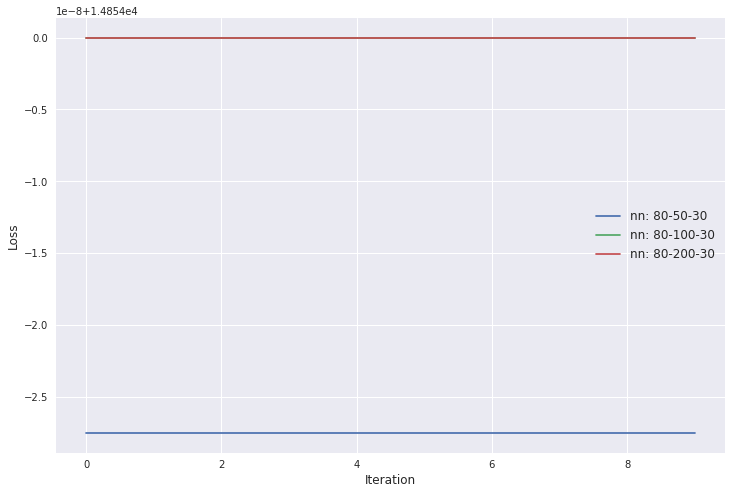

In [126]:
# Create and train a tensorflow model of a neural network
def create_train_model(hidden_nodes, num_iters):

    # Reset the graph
    tf.reset_default_graph()

    # Placeholders for input and output data
    X = tf.placeholder(shape=(14854, 117), dtype=tf.float64, name='X')
    y = tf.placeholder(shape=(14854, 2), dtype=tf.float64, name='y')
    
    # Variables for two group of weights between the three layers of the network
    W1 = tf.Variable(np.random.rand(117, hidden_nodes), dtype=tf.float64)
    print('W1', W1)
    W2 = tf.Variable(np.random.rand(hidden_nodes, 2), dtype=tf.float64)
    print('W2', W2)

    # Create the neural net graph
    A1 = tf.sigmoid(tf.matmul(X, W1))
    print('A1', A1)
    print('y', y)
    y_est = tf.sigmoid(tf.matmul(A1, W2))
    
    # Define a loss function
    deltas = tf.square(y_est - y)
    loss = tf.reduce_sum(deltas)

    # Define a train operation to minimize the loss
    optimizer = tf.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)

    # Initialize variables and run session
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # Go through num_iters iterations
    for i in range(num_iters):
        sess.run(train, feed_dict={X: Xtrain, y: ytrain})
        loss_plot[hidden_nodes].append(sess.run(loss, feed_dict={X: Xtrain.as_matrix(), y: ytrain.as_matrix()}))
        weights1 = sess.run(W1)
        weights2 = sess.run(W2)
        
    print("loss (hidden nodes: %d, iterations: %d): %.2f" % (hidden_nodes, num_iters, loss_plot[hidden_nodes][-1]))
    sess.close()
    return weights1, weights2
  
  
# Run the training

# Plot the loss function over iterations
num_hidden_node1 = [50, 100, 200]
loss_plot = {50: [], 100: [], 200: []}  
weights1 = {10: None, 100: None, 200: None}  
weights2 = {20: None, 100: None, 200: None} 
num_iters = 10

plt.figure(figsize=(12,8))  
for hidden_nodes in num_hidden_nodes:  
    weights1[hidden_nodes], weights2[hidden_nodes] = create_train_model(hidden_nodes, num_iters)
    plt.plot(range(num_iters), loss_plot[hidden_nodes], label="nn: 80-%d-30" % hidden_nodes)

plt.xlabel('Iteration', fontsize=12)  
plt.ylabel('Loss', fontsize=12)  
plt.legend(fontsize=12) 

In [125]:
#more.....

# Create and train a tensorflow model of a neural network
def create_train_model(hidden_nodes, num_iters):

    # Reset the graph
    tf.reset_default_graph()

    # Placeholders for input and output data
    X = tf.placeholder(shape=(14854, 117), dtype=tf.float64, name='X')
    y = tf.placeholder(shape=(14854, 2), dtype=tf.float64, name='y')
    
    # Variables for two group of weights between the three layers of the network
    Wtest = tf.Variable(np.random.rand(117, hidden_nodes[2]), dtype=tf.float64)
    W1 = tf.Variable(np.random.rand(117, hidden_nodes[0]), dtype=tf.float64)
    print('W1', W1)
    W2 = tf.Variable(np.random.rand(hidden_nodes[0], hidden_nodes[1]), dtype=tf.float64)
    W3 = tf.Variable(np.random.rand(hidden_nodes[1], hidden_nodes[2]), dtype=tf.float64)
    W4 = tf.Variable(np.random.rand(hidden_nodes[2], 2), dtype=tf.float64)
    print('W4', W4)

    # Create the neural net graph
    A1 = tf.sigmoid(tf.matmul(X, Wtest))
    print('A1', A1)
    A2 = tf.sigmoid(tf.matmul(W1, W2))
    print('A2', A2)
    A3 = tf.sigmoid(tf.matmul(W2, W3))
    print('A3', A3)
    print('y', y)
    y_est = tf.sigmoid(tf.matmul(A1, W4))
    print('y_est', y_est)
    
    
    # Define a loss function
    deltas = tf.square(y_est - y)
    print('deltas', deltas)
    loss = tf.reduce_sum(deltas)

    # Define a train operation to minimize the loss
    optimizer = tf.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)

    # Initialize variables and run session
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # Go through num_iters iterations
    for i in range(num_iters):
        sess.run(train, feed_dict={X: Xtrain, y: ytrain})
        loss_plot[hidden_nodes].append(sess.run(loss, feed_dict={X: Xtrain.as_matrix(), y: ytrain.as_matrix()}))
        weights1 = sess.run(W1)
        weights2 = sess.run(W2)
        weights3 = sess.run(W3)
        weights4 = sess.run(W4)
        
    print("loss (hidden nodes: %d, iterations: %d): %.2f" % (hidden_nodes, num_iters, loss_plot[hidden_nodes][-1]))
    sess.close()
    return weights1, weights2, weights3, weights4
  
  
# Run the training

# Plot the loss function over iterations
hidden_nodes = [70, 100, 40]
loss_plot = {50}  
weights1 = {10}  
weights2 = {10}  
weights3 = {10}  
weights4 = {10}  
num_iters = 10

plt.figure(figsize=(12,8))  
weights1[hidden_nodes[0]], weights2[hidden_nodes[1]], weights3[hidden_nodes[2]], weights4[hidden_nodes[2]] = create_train_model(hidden_nodes, num_iters)
plt.plot(range(num_iters), loss_plot[hidden_nodes], label="nn: 117-%d-2" % hidden_nodes)

plt.xlabel('Iteration', fontsize=12)  
plt.ylabel('Loss', fontsize=12)  
plt.legend(fontsize=12) 

W1 <tf.Variable 'Variable_1:0' shape=(117, 70) dtype=float64_ref>
W4 <tf.Variable 'Variable_4:0' shape=(40, 2) dtype=float64_ref>
A1 Tensor("Sigmoid:0", shape=(14854, 40), dtype=float64)
A2 Tensor("Sigmoid_1:0", shape=(117, 100), dtype=float64)
A3 Tensor("Sigmoid_2:0", shape=(70, 40), dtype=float64)
y Tensor("y:0", shape=(14854, 2), dtype=float64)
y_est Tensor("Sigmoid_3:0", shape=(14854, 2), dtype=float64)
deltas Tensor("Square:0", shape=(14854, 2), dtype=float64)


TypeError: 'set' object is not subscriptable

In [102]:
# Evaluate models on the test set
X = tf.placeholder(shape=(4951, 117), dtype=tf.float64, name='X')  
y = tf.placeholder(shape=(4951, 2), dtype=tf.float64, name='y')

for hidden_nodes in num_hidden_nodes:

    # Forward propagation
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Calculate the predicted outputs
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: Xtest, y: ytest})

    #Calculate the prediction accuracy
    correct = [estimate.argmax(axis=0) == target.argmax(axis=0) 
               for estimate, target in zip(y_est_np, ytest.as_matrix())]
    accuracy = 100 * sum(correct) / len(correct)
    print('Network architecture 80-%d-30, accuracy: %.2f%%' % (hidden_nodes, accuracy))

Network architecture 80-50-30, accuracy: 0.00%
Network architecture 80-100-30, accuracy: 49.89%
Network architecture 80-200-30, accuracy: 49.89%


In [79]:
from sklearn.metrics import *

# Evaluate models on the test set
X = tf.placeholder(shape=(4951, 117), dtype=tf.float64, name='X')  
y = tf.placeholder(shape=(4951, 2), dtype=tf.float64, name='y')

for hidden_nodes in num_hidden_nodes:

    # Forward propagation
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Calculate the predicted outputs
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: Xtest, y: ytest})

    #Calculate the prediction accuracy
    y_true = []
    y_pred = []
    for estimate, target in zip(y_est_np, ytest.as_matrix()):
      y_pred.append(estimate.argmax(axis=0))
      y_true.append(target.argmax(axis=0))
    accuracy = 100 * sum(correct) / len(correct)
    print('accuracy', accuracy_score(y_true, y_pred), 'precision', precision_score(y_true, y_pred, average='weighted'), 'recall', recall_score(y_true, y_pred, average='weighted'), 'f1_score', f1_score(y_true, y_pred, average='weighted'))

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.5011108866895576 precision 0.2511121207587947 recall 0.5011108866895576 f1_score 0.3345683826363812
accuracy 0.49888911331044233 precision 0.24889034737967938 recall 0.49888911331044233 f1_score 0.3320997466316649
accuracy 0.49888911331044233 precision 0.24889034737967938 recall 0.49888911331044233 f1_score 0.3320997466316649
